In [1]:
cd ..

/home/pablo/Programming/papers/finint


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from numpy import linspace
xivec = linspace(0.45, 2.0, 100)
N_1 = xivec.searchsorted(1) - 1
N_05 = xivec.searchsorted(0.5) - 0.5

In [4]:
import numpy

In [5]:
import pickle
with file("results/welfare_gains.pickle") as f:
    welfare_gains = pickle.load(f)
all_welfares = welfare_gains['global']
all_welfares_pert = welfare_gains['perturbations']

In [6]:
N = all_welfares['normal']['baseline_10'].shape


In [7]:
import shelve
sh = shelve.open('results/solutions_B')
print( sh['baseline_30_gamma_50'].keys() )
sh.close()

['calib', 'values', 'solution', 'fname', 'calibration_dict']


In [8]:
lw = 1.3
line_1_A = {'color':'blue', 'linestyle':'--', 'linewidth':lw}
line_1_B = {'color':'blue', 'linestyle':'-', 'linewidth':lw}
line_1_C = {'color':'blue', 'linestyle':'-.', 'linewidth':lw}
line_2_A = {'color':'red', 'linestyle':'--', 'linewidth':lw}
line_2_B = {'color':'red', 'linestyle':'-', 'linewidth':lw}
line_2_C = {'color':'red', 'linestyle':'-.', 'linewidth':lw}
line_A = {'color':'black', 'linestyle':'--', 'linewidth':lw}
line_B = {'color':'black', 'linestyle':'-', 'linewidth':lw}
line_C = {'color':'black', 'linestyle':'-.', 'linewidth':lw}

## Figure 4:
Welfare analysis of financial integration with higher degree of risk aversion (Epstein-Zin preferences).

In [68]:
# developed vs emerging as a function of gamma

In [13]:
plt.figure(figsize=(8,5))
fig_4, ax = plt.subplots()
scenarios = ['baseline_30', 'baseline_30_gamma_10', 'baseline_30_gamma_20', 'baseline_30_gamma_30','baseline_30_gamma_40', 'baseline_30_gamma_50']
gammas = [4, 10, 20, 30, 40, 50]
series = [
    [all_welfares['normal'][scenario][N_1, 0] for scenario in (scenarios)], # developed
    [all_welfares['normal'][scenario][N_1, 1] for scenario in (scenarios)], # emerging
#     [all_welfares['normal'][scenario][N_05, 0] for scenario in (scenarios)], # developed
#     [all_welfares['normal'][scenario][N_05, 1] for scenario in (scenarios)], # emerging
]
plt.plot(gammas, series[0], label='developed country', **line_1_B)
plt.plot(gammas, series[1], label='emerging country', **line_2_B)
plt.xlabel("Risk aversion: $\gamma$")
plt.ylabel("Welfare gains")
plt.ylim(0,1.5)
plt.grid()
plt.legend(loc='upper left')
plt.savefig('graphs/figure_4.png', bbox_inches='tight')
plt.savefig('graphs/figure_4.pdf', bbox_inches='tight')

## Figure 5:
Welfare analysis of financial integration. Robustness with higher degree of risk
aversion and different degrees of capital scarcity.

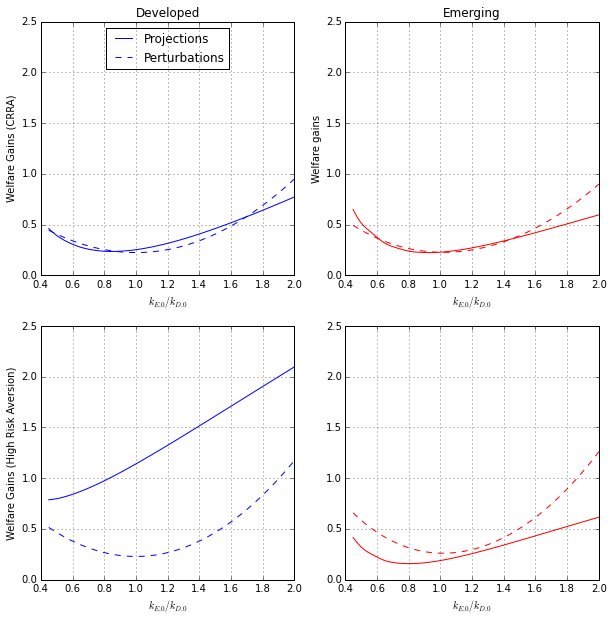

In [14]:
fig_5 = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(xivec, all_welfares['normal']['baseline_30'][:,0], color='blue', label='Projections')
plt.plot(xivec, all_welfares_pert['normal']['baseline_30'][:,0], color='blue', linestyle='dashed', label='Perturbations')
plt.title("Developed")
plt.legend(loc='upper center')
plt.xlabel("$k_{E,0}/k_{D,0}$")
plt.grid()
plt.ylim(0,2.5)
plt.ylabel("Welfare Gains (CRRA)")



plt.subplot(222)
plt.plot(xivec, all_welfares['normal']['baseline_30'][:,1], color='red', label='baseline')
plt.plot(xivec, all_welfares_pert['normal']['baseline_30'][:,1], color='red', linestyle='dashed', label='baseline')
plt.title("Emerging")
plt.ylabel("Welfare gains")
plt.ylim(0,2.5)
plt.xlabel("$k_{E,0}/k_{D,0}$")
plt.grid()
plt.subplot(223)
plt.plot(xivec, all_welfares['normal']['baseline_30_gamma_40'][:,0], color='blue')
plt.plot(xivec, all_welfares_pert['normal']['baseline_30_gamma_40'][:,0], color='blue', linestyle='dashed')
plt.xlabel("$k_{E,0}/k_{D,0}$")
plt.ylabel("Welfare Gains (High Risk Aversion)")
yl = plt.ylim()
plt.grid()

plt.subplot(224)
plt.plot(xivec, all_welfares['normal']['baseline_30_gamma_40'][:,1], color='red', label='baseline')
plt.plot(xivec, all_welfares_pert['normal']['baseline_30_gamma_40'][:,1], color='red', linestyle='dashed', label='baseline')
plt.xlabel("$k_{E,0}/k_{D,0}$")
plt.ylim(yl[0], yl[1])
plt.grid()
plt.savefig('graphs/figure_5.png', bbox_inches='tight')
plt.savefig('graphs/figure_5.pdf', bbox_inches='tight')

## Figure 7:
Welfare analysis of financial integration. Robustness with alternative financial markets structure.

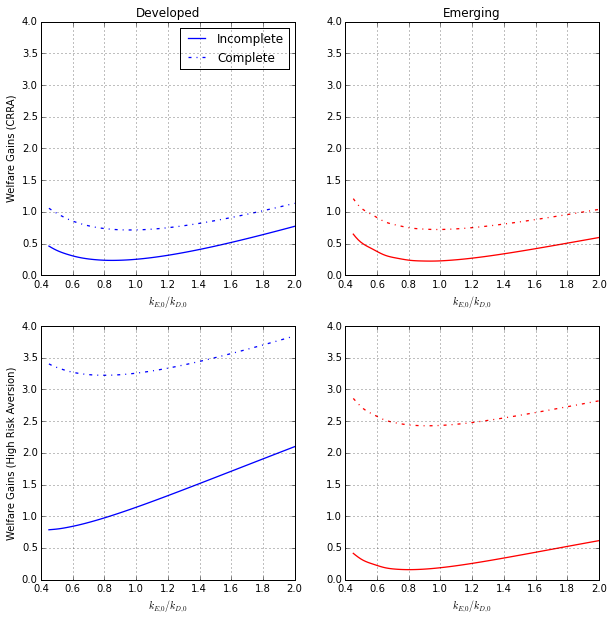

In [10]:
# TODO : remove S
S = 0 # first observations to be excluded

args1 = {'color':'blue', 'linestyle':'--'}
args2 = {'color':'red', 'linestyle':'-'}
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(xivec, all_welfares['normal']['baseline_30'][:,0], label='Incomplete', **line_1_B)
plt.plot(xivec[S:], all_welfares['normal']['baseline_30'][:,2][S:], label='Complete', **line_1_C)
plt.legend()
plt.xlabel("$k_{E,0}/k_{D,0}$")
plt.ylabel("Welfare Gains (CRRA)")
plt.title("Developed")
plt.grid()
plt.ylim(0,4)
plt.subplot(222)
plt.plot(xivec, all_welfares['normal']['baseline_30'][:,1], **line_2_B)
plt.plot(xivec[S:], all_welfares['normal']['baseline_30'][:,3][S:], **line_2_C)
plt.xlabel("$k_{E,0}/k_{D,0}$")
plt.title("Emerging")

plt.ylim(0,4)
plt.grid()
plt.subplot(223)
plt.plot(xivec, all_welfares['normal']['baseline_30_gamma_40'][:,0], **line_1_B)
plt.plot(xivec[S:], all_welfares['normal']['baseline_30_gamma_40'][:,2][S:], **line_1_C)
plt.xlabel("$k_{E,0}/k_{D,0}$")
plt.ylabel("Welfare Gains (High Risk Aversion)")
plt.ylim(0,4)
plt.grid()
plt.subplot(224)
plt.plot(xivec, all_welfares['normal']['baseline_30_gamma_40'][:,1], **line_2_B)
plt.plot(xivec[S:], all_welfares['normal']['baseline_30_gamma_40'][:,3][S:], **line_2_C)
plt.xlabel("$k_{E,0}/k_{D,0}$")
plt.ylim(0,4)
plt.grid()

plt.savefig('graphs/figure_7.png', bbox_inches='tight')
plt.savefig('graphs/figure_7.pdf', bbox_inches='tight')

## Figure 8:
Welfare analysis of financial integration. Robustness with countries of different
sizes.

In [16]:
all_welfares['normal'].keys()

['riskfree',
 'baseline_10',
 'baseline_10_bounds_5',
 'baseline_10_no_bounds',
 'baseline_10_ez_no_bounds',
 'baseline_30',
 'baseline_30_ez_no_bounds',
 'baseline_10_ez',
 'baseline_10_ez_gamma_2',
 'baseline_10_ez_gamma_6',
 'baseline_30_ez',
 'baseline_10_gamma_10',
 'baseline_10_gamma_20',
 'baseline_10_gamma_30',
 'baseline_10_gamma_40',
 'baseline_10_gamma_50',
 'baseline_30_gamma_10',
 'baseline_30_gamma_20',
 'baseline_30_gamma_30',
 'baseline_30_gamma_40',
 'baseline_30_gamma_50',
 'corr_11',
 'corr_12',
 'corr_13',
 'corr_21',
 'corr_22',
 'corr_23',
 'corr_31',
 'corr_32',
 'corr_33',
 'soe',
 'soe_high_gamma',
 'south_europe',
 'middle_east']

In [10]:
# TODO : remove S


args1 = {'color':'blue', 'linestyle':'--'}
args2 = {'color':'red', 'linestyle':'-'}
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(xivec, all_welfares['normal']['baseline_30'][:,1], label='Baseline', **line_2_C)
plt.plot(xivec, all_welfares['normal']['soe'][:,1], label='Small Country', **line_2_B)
plt.legend()
plt.xlabel("$k_{E,0}/k_{D,0}$")
plt.ylabel("Welfare Gains (CRRA)")
plt.title("Emerging")
plt.grid()
plt.ylim(0,1.8)
# plt.ylim(0,2.5)
plt.subplot(122)
plt.plot(xivec, all_welfares['normal']['baseline_30_gamma_40'][:,1], label='Baseline', **line_2_C)
plt.plot(xivec, all_welfares['normal']['soe_high_gamma'][:,1], label='Small Country', **line_2_B)
plt.legend()
plt.xlabel("$k_{E,0}/k_{D,0}$")
plt.ylabel("Welfare Gains (High Risk Aversion)")
plt.title("Emerging")
plt.grid()
plt.ylim(0,1.8)
# plt.ylim(0,1)
plt.savefig('graphs/figure_8.png', bbox_inches='tight')
plt.savefig('graphs/figure_8.pdf', bbox_inches='tight')

## Figure B2:

Summary of welfare gains for main specifications

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(all_welfares['normal']['baseline_30'][:,0], label='low risk aversion', linestyle='-')
plt.plot(all_welfares['normal']['baseline_30_gamma_40'][:,0], label='high risk aversion', linestyle='--')
plt.plot(all_welfares['long_run']['long_run_002'][:,0],label='long run risk', linestyle='-.')
plt.legend(loc='upper left')
plt.ylabel("Welfare Gains")
plt.grid()
plt.xlabel("$k_{E,0}/k_{D,0}$")


plt.title("Developed")
plt.subplot(122)
plt.plot(all_welfares['normal']['baseline_30'][:,1], linestyle='-')
plt.plot(all_welfares['normal']['baseline_30_gamma_40'][:,1], linestyle='--')
plt.plot(all_welfares['long_run']['long_run_002'][:,1], linestyle='-.')
plt.title("Emerging")
plt.grid()
plt.xlabel("$k_{E,0}/k_{D,0}$")

plt.savefig('graphs/figure_B2.png', bbox_inches='tight')
plt.savefig('graphs/figure_B2.pdf', bbox_inches='tight')


In [ ]:
all_welfares

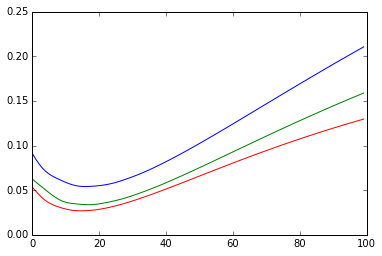

In [12]:
for scen in ['long_run_000_30','long_run_001_30','long_run_002_30']:
    plt.plot(all_welfares['long_run'][scen][:,1])

In [75]:
baseline = all_welfares['normal']['baseline_30']
baseline_hra = all_welfares['normal']['baseline_30_gamma_40']
long_run_risk = all_welfares['long_run']['long_run_001_30']


NameError: name 'baseline' is not defined

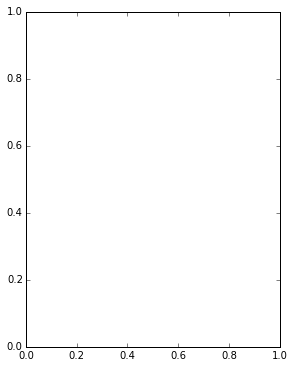

In [29]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(xivec, baseline[:,0])
plt.plot(xivec, baseline_hra[:,0])
plt.plot(xivec, long_run_risk[:,0])
plt.subplot(122)
plt.plot(xivec, baseline[:,1])
plt.plot(xivec, baseline_hra[:,1])
plt.plot(xivec, long_run_risk[:,1])


In [28]:
i = 1
plt.plot(xivec, all_welfares['normal']['baseline_30_ez'][:,1], color='black', linestyle='--')
plt.plot(xivec, all_welfares['long_run']['baseline_ez'][:,1], color='black', linestyle=':')
plt.plot(xivec, all_welfares['long_run']['long_run_001'][:,1])
plt.plot(xivec, all_welfares['long_run']['long_run_002'][:,1])
plt.plot(xivec, all_welfares['long_run']['long_run_95_001'][:,1])
plt.plot(xivec, all_welfares['long_run']['long_run_95_002'][:,1])


KeyError: 'baseline_ez'

In [ ]:
# plt.plot(xivec, all_welfares['normal']['south_europe'][:,0], color='black', linestyle='--')


In [13]:
# plt.plot(xivec, all_welfares['normal']['middle_east'][:,0], color='black', linestyle='--')


# Interactive versions

In [14]:
from plotly import plotly as plty
from plotly.graph_objs import *

In [15]:
import plotly

In [16]:
color1 = "#447adb"
color2 = "#db5a44"
color3 = 'yellow'
color4 = 'green'
color5 = 'pink'
line1 = Line(dash='dash',color=color1)
line2 = Line(color=color2)
line3 = Line(dash='--',color=color3)
line4 = Line(dash='--',color=color4)
line5 = Line(dash='--',color=color5)
line1b = Line(dash='dash',color=color3)
line2b = Line(color=color3)


## Figure 5: sensitivity w.r.t gamma

In [17]:

scenarios = ['baseline_30', 'baseline_30_gamma_10', 'baseline_30_gamma_20', 'baseline_30_gamma_30','baseline_30_gamma_40']
gammas = [4, 10, 20, 30, 40]
series = [
    [all_welfares['normal'][scenario][N_1, 0] for scenario in (scenarios)], # developed
    [all_welfares['normal'][scenario][N_1, 1] for scenario in (scenarios)], # emerging
]
data = Data([
    Scatter(x=gammas, y=series[0], name='developed country', line=line1),
    Scatter(x=gammas, y=series[1], name='emerging country', line=line2)
])
layout = Layout(
    xaxis=XAxis(title="gamma"),
    yaxis=YAxis(range=[0,1.5], title="Welfare Gains (%)"),
    title='Sensitivity to gamma (baseline case)'
)
figure = Figure(data=data, layout=layout)
figname = "firw_figure_5"
fig = plty.iplot(figure, filename=figname)
ff = plty.get_figure(fig.resource)
plty.image.save_as(ff, 'graphs/{}.png'.format(figname))
plty.image.save_as(ff, 'graphs/{}.pdf'.format(figname))
fig

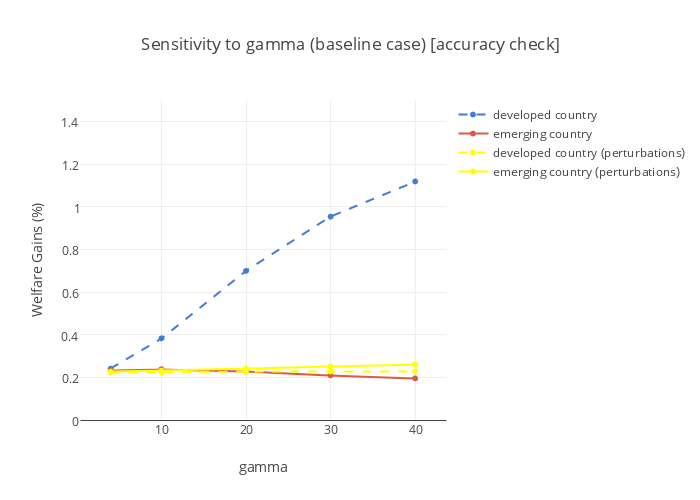

In [ ]:
scenarios = ['baseline_30', 'baseline_30_gamma_10', 'baseline_30_gamma_20', 'baseline_30_gamma_30','baseline_30_gamma_40']
gammas = [4, 10, 20, 30, 40]
series = [
    [all_welfares['normal'][scenario][N_1, 0] for scenario in (scenarios)], # developed
    [all_welfares['normal'][scenario][N_1, 1] for scenario in (scenarios)], # emerging
    [all_welfares_pert['normal'][scenario][N_1, 0] for scenario in (scenarios)], # developed
    [all_welfares_pert['normal'][scenario][N_1, 1] for scenario in (scenarios)], # emerging
]
data = Data([
    Scatter(x=gammas, y=series[0], name='developed country', line=line1),
    Scatter(x=gammas, y=series[1], name='emerging country', line=line2),
    Scatter(x=gammas, y=series[2], name='developed country (perturbations)', line=line1b),
    Scatter(x=gammas, y=series[3], name='emerging country (perturbations)', line=line2b)

])
layout = Layout(
    xaxis=XAxis(title="gamma"),
    yaxis=YAxis(range=[0,1.5], title="Welfare Gains (%)"),
    title='Sensitivity to gamma (baseline case) [accuracy check]'
)
figure = Figure(data=data, layout=layout)

figname = "firw_figure_5_pert"
fig = plty.iplot(figure, filename=figname)
ff = plty.get_figure(fig.resource)
plty.image.save_as(ff, 'graphs/{}.png'.format(figname))
plty.image.save_as(ff, 'graphs/{}.pdf'.format(figname))
fig

In [22]:
scenarios = ['baseline_30_ez_gamma_2', 'baseline_30_ez_gamma_6',  'baseline_30_ez']
gammas = [2,6,10]
series = [
    [all_welfares['normal'][scenario][N_1, 0] for scenario in (scenarios)], # developed
    [all_welfares['normal'][scenario][N_1, 1] for scenario in (scenarios)], # emerging
]
data = Data([
    Scatter(x=gammas, y=series[0], name='developed country', line=line1),
    Scatter(x=gammas, y=series[1], name='emerging country', line=line2)
])
layout = Layout(
    xaxis=XAxis(title="gamma"),
    yaxis=YAxis(range=[0,1.5], title="Welfare Gains (%)"),
    title='Sensitivity to gamma (Epstein-Zin)'
)
figure = Figure(data=data, layout=layout)

figname = "firw_figure_5_ez"
fig = plty.iplot(figure, filename=figname)
ff = plty.get_figure(fig.resource)
plty.image.save_as(ff, 'graphs/{}.png'.format(figname))
plty.image.save_as(ff, 'graphs/{}.pdf'.format(figname))
fig

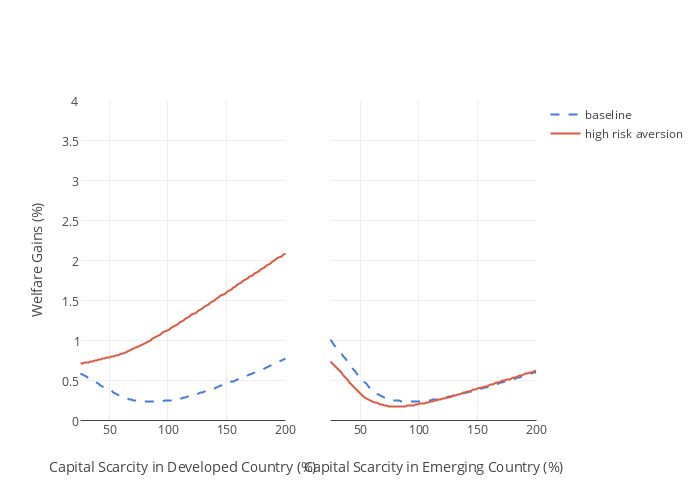

In [ ]:
scenarios = ['baseline_30', 'baseline_30_gamma_10', 'baseline_30_gamma_20', 'baseline_30_gamma_30','baseline_30_gamma_40']
gammas = [4, 10, 20, 30, 40]
series = [
    all_welfares['normal']['baseline_30'][:,0], 
    all_welfares['normal']['baseline_30_gamma_40'][:,0], # emerging
    all_welfares['normal']['baseline_30'][:,1],
    all_welfares['normal']['baseline_30_gamma_40'][:,1]
]
data = Data([
    Scatter(x=xivec*100, y=series[0], name='baseline', line=line1),
    Scatter(x=xivec*100, y=series[1], name='high risk aversion',line=line2),
    Scatter(x=xivec*100, y=series[2], xaxis='x2', name='baseline', line=line1, showlegend=False),
    Scatter(x=xivec*100, y=series[3], xaxis='x2', name='high risk aversion', showlegend=False,line=line2)
])
layout = Layout(
    xaxis=XAxis(domain=[0,0.45], title="Capital Scarcity in Developed Country (%)"),
    yaxis=YAxis(range=[0,4], title="Welfare Gains (%)"),
    xaxis2=XAxis(domain=[0.55,1.0], title="Capital Scarcity in Emerging Country (%)"),
)
figure = Figure(data=data, layout=layout)

figname = "firw_figure_6"
fig = plty.iplot(figure, filename=figname)
ff = plty.get_figure(fig.resource)
plty.image.save_as(ff, 'graphs/{}.png'.format(figname))
plty.image.save_as(ff, 'graphs/{}.pdf'.format(figname))
fig
# xlabel("Risk aversion: $\gamma$")
# ylabel("Welfare gains")
# legend(loc='upper left')

In [ ]:
series = [
    all_welfares['normal']['baseline_30'][:,0], 
    all_welfares['normal']['baseline_30_no_bounds'][:,0], # emerging
    all_welfares_pert['normal']['baseline_30'][:,0], # emerging
    all_welfares['normal']['baseline_30'][:,1],
    all_welfares['normal']['baseline_30_no_bounds'][:,1],
    all_welfares_pert['normal']['baseline_30'][:,1]
    
]
data = Data([
    Scatter(x=xivec*100, y=series[0], name='baseline', line=line1),
    Scatter(x=xivec*100, y=series[1], name='no boundaries',line=line2),
    Scatter(x=xivec*100, y=series[2], name='perturbations',line=line3),
    Scatter(x=xivec*100, y=series[3], xaxis='x2', name='baseline', line=line1, showlegend=False),
    Scatter(x=xivec*100, y=series[4], xaxis='x2', name='no boundaries', showlegend=False,line=line2),
    Scatter(x=xivec*100, y=series[5], xaxis='x2', name='perturbations',line=line3, showlegend=False),
])
layout = Layout(
    xaxis=XAxis(domain=[0,0.45], title="Capital Scarcity in Developed Country (%)"),
    yaxis=YAxis(range=[0,1.5], title="Welfare Gains (%)"),
    xaxis2=XAxis(domain=[0.55,1.0], title="Capital Scarcity in Emerging Country (%)"),
    title='Accuracy checks (baseline)'
)
figure = Figure(data=data, layout=layout)
figname = "firw_figure_X_accuracy"
fig = plty.iplot(figure, filename=figname)
ff = plty.get_figure(fig.resource)
plty.image.save_as(ff, 'graphs/{}.png'.format(figname))
plty.image.save_as(ff, 'graphs/{}.pdf'.format(figname))
fig

KeyError: 'baseline_30_no_bounds'

In [ ]:
series = [
    all_welfares['normal']['baseline_30_ez'][:,0], 
    all_welfares['normal']['baseline_30_ez_no_bounds'][:,0], # emerging
    all_welfares_pert['normal']['baseline_30_ez'][:,0], # emerging
    all_welfares['normal']['baseline_30_ez'][:,1],
    all_welfares['normal']['baseline_30_ez_no_bounds'][:,1],
    all_welfares_pert['normal']['baseline_30_ez'][:,1]
    
]
data = Data([
    Scatter(x=xivec*100, y=series[0], name='baseline', line=line1),
    Scatter(x=xivec*100, y=series[1], name='no boundaries',line=line2),
    Scatter(x=xivec*100, y=series[2], name='perturbations',line=line3),
    Scatter(x=xivec*100, y=series[3], xaxis='x2', name='baseline', line=line1, showlegend=False),
    Scatter(x=xivec*100, y=series[4], xaxis='x2', name='no boundaries', showlegend=False,line=line2),
    Scatter(x=xivec*100, y=series[5], xaxis='x2', name='perturbations',line=line3, showlegend=False),
])
layout = Layout(
    xaxis=XAxis(domain=[0,0.45], title="Capital Scarcity in Developed Country (%)"),
    yaxis=YAxis(range=[0,1.5], title="Welfare Gains (%)"),
    xaxis2=XAxis(domain=[0.55,1.0], title="Capital Scarcity in Emerging Country (%)"),
    title='Accuracy checks (Epstein-Zin)'
)
figure = Figure(data=data, layout=layout)
figname = "firw_figure_X_accuracy_EZ"
fig = plty.iplot(figure, filename=figname)
ff = plty.get_figure(fig.resource)
plty.image.save_as(ff, 'graphs/{}.png'.format(figname))
plty.image.save_as(ff, 'graphs/{}.pdf'.format(figname))
fig

In [ ]:
scenarios = ['baseline_30', 'baseline_30_gamma_10', 'baseline_30_gamma_20', 'baseline_30_gamma_30','baseline_30_gamma_40']
gammas = [4, 10, 20, 30, 40]
series = [
    all_welfares['long_run']['baseline_ez'][:,0], 
    all_welfares['long_run']['long_run_001'][:,0], # emerging
    all_welfares['long_run']['long_run_002'][:,0], # emerging
    all_welfares['long_run']['long_run_95_001'][:,0], # emerging
    all_welfares['long_run']['long_run_95_002'][:,0], # emerging

    all_welfares['long_run']['baseline_ez'][:,1],
    all_welfares['long_run']['long_run_001'][:,1],
    all_welfares['long_run']['long_run_002'][:,1],
    all_welfares['long_run']['long_run_95_001'][:,1],
    all_welfares['long_run']['long_run_95_002'][:,1],
    
#     all_welfares['normal']['baseline_30_gamma_40'][:,1]
]
data = Data([
    Scatter(x=xivec*100, y=series[0], name='baseline (ez)', line=line1),
    Scatter(x=xivec*100, y=series[1], name='long run (001)',line=line2),
    Scatter(x=xivec*100, y=series[2], name='long run (002)',line=line3),
    Scatter(x=xivec*100, y=series[3], name='long run (001-95)',line=line4),
    Scatter(x=xivec*100, y=series[4], name='long run (002-95)',line=line5),

    Scatter(x=xivec*100, y=series[5], xaxis='x2', name='baseline (ez)', line=line1, showlegend=False),    
    Scatter(x=xivec*100, y=series[6], xaxis='x2', name='long run (001)', line=line2, showlegend=False),
    Scatter(x=xivec*100, y=series[7], xaxis='x2', name='long run (002)', line=line3, showlegend=False),
    Scatter(x=xivec*100, y=series[8], xaxis='x2', name='long run (001-95)', line=line4, showlegend=False),
    Scatter(x=xivec*100, y=series[9], xaxis='x2', name='long run (002-95)', line=line5, showlegend=False),

])
layout = Layout(
    xaxis=XAxis(range=[50,125],domain=[0,0.45], title="Capital Scarcity in Developed Country (%)"),
    yaxis=YAxis(title="Welfare Gains (%)"),
    xaxis2=XAxis(range=[50,125],domain=[0.55,1.0], title="Capital Scarcity in Emerging Country (%)"),
)
figure = Figure(data=data, layout=layout)
figname = "firw_figure_Y"
fig = plty.iplot(figure, filename=figname)
ff = plty.get_figure(fig.resource)
plty.image.save_as(ff, 'graphs/{}.png'.format(figname))
plty.image.save_as(ff, 'graphs/{}.pdf'.format(figname))
# xlabel("Risk aversion: $\gamma$")
# ylabel("Welfare gains")
# legend(loc='upper left')

In [ ]:
from IPython.display import Image

In [ ]:
Image( 'graphs/{}.png'.format(figname) )

43

In [70]:
i_1 = numpy.where(xivec>1)[0][0]
def get_corr_welf(i,j,complete=False):
    
    l = all_welfares['normal']['corr_{}{}'.format(i,j)][i_1,:]
    if not complete:
        return l[0], l[1]
    else:
        return l[2], l[3]
numpy.array( [['corr_{}_{}'.format(i,j) for j in range(1,4)] for i in range(1,4)] )

array([['corr_1_1', 'corr_1_2', 'corr_1_3'],
       ['corr_2_1', 'corr_2_2', 'corr_2_3'],
       ['corr_3_1', 'corr_3_2', 'corr_3_3']], 
      dtype='|S8')

In [71]:
for i in range(1,4):
    print(  '{}\t{}\t{}'.format( *[get_corr_welf(i,j) for j in range(1,4)]) )

(0.091700273429351498, 0.09111050375112395)	(0.067963425289030432, 0.068218983359202845)	(0.04997729235616255, 0.050949733785743412)
(0.28209412827870928, 0.22299232654494627)	(0.15810897322960926, 0.13713129551804482)	(0.068488260437482573, 0.066093827665647531)
(1.4811510001357941, 0.63175857120756351)	(0.73126697915661953, 0.43199322884368563)	(0.18452267044068993, 0.15783533550417506)


In [86]:
for i in range(1,4):
    print(  '{}\t{}\t{}'.format( *[  '{}\t{}'.format(*get_corr_welf(i,j, False))  for j in range(1,4)]) )

0.0917002734294	0.0911105037511	0.067963425289	0.0682189833592	0.0499772923562	0.0509497337857
0.282094128279	0.222992326545	0.15810897323	0.137131295518	0.0684882604375	0.0660938276656
1.48115100014	0.631758571208	0.731266979157	0.431993228844	0.184522670441	0.157835335504


In [87]:
for i in range(1,4):
    print(  '{} {} {}'.format( *[  '{} {}'.format(*get_corr_welf(i,j, True))  for j in range(1,4)]) )

0.290029129998 0.289972080924 0.219743203402 0.219979852939 0.164511219254 0.164573841672
0.716970241424 0.724619518053 0.43787709556 0.443256564824 0.220428379987 0.222691389172
2.31639641776 2.38435647888 1.24298691594 1.30224337728 0.426249763672 0.442802536641


In [72]:
get_corr_welf(1,1, True)

(0.29002912999802621, 0.28997208092422788)

In [74]:
l = all_welfares['normal']['corr_33'] 
plt.subplot(121)
plt.plot( l[:,0] )
plt.plot( l[:,1] )
plt.hlines(0,*plt.xlim())
plt.subplot(122)
plt.plot( l[:,2] )
plt.plot( l[:,3] )
plt.hlines(0,*plt.xlim())